# 2022 Running Analysis


In [1]:
from stravadataanalysis.src.repository import data_loader

activities_2022 = data_loader.load_activities("../data/2022/activities")
runs = activities_2022[activities_2022['type'] == 'Run']


## 2022 Highlight

In [2]:
from stravadataanalysis.src.view import data_format
from stravadataanalysis.src.domain import highlights
import pandas as pd

highlights_requests = [
    highlights.Highlight('max_distance', 'distance', display_function=data_format.m_as_km),
    highlights.Highlight('max_duration', 'elapsed_time', display_function=lambda x: data_format.seconds_as_hhmmss(int(x))),
    highlights.Highlight('max_elevation_gain', 'total_elevation_gain', display_function=data_format.m),
    highlights.Highlight('earlier_run', 'start_time', ascending_sort_order=True),
    highlights.Highlight('max_average_speed', 'average_speed', data_format.mps_as_minpkm),
    highlights.Highlight('max_top_heartrate', 'max_heartrate', data_format.bpm),
]

columns = ["highlight", "value", "name", "start_date_local", "id"]

highlights_2022 = []
for highlight_request in highlights_requests:
    highlight = highlight_request.transform(runs)
    highlights_2022.append(highlight)

pd.DataFrame(highlights_2022, columns=columns)

,highlight,value,name,start_date_local,id
15,max_distance,21.34km,Course à pied l'après-midi,2022-03-13T16:21:44Z,6819196468
15,max_duration,01:50:38,Course à pied l'après-midi,2022-03-13T16:21:44Z,6819196468
22,max_elevation_gain,263m,Henvic / Sentier Côtier à Carantec,2022-04-17T17:00:17Z,6997761739
40,earlier_run,06:51:23,Course à pied le matin,2022-07-12T06:51:23Z,7454700738
27,max_average_speed,4:45min/km,Course à pied matinale,2022-05-07T10:58:42Z,7101290577
0,max_top_heartrate,192bpm,Course à pied sous la pluie,2022-01-03T12:01:08Z,6465654440


## Segments
Top 10 segments of the year :

In [3]:
from stravadataanalysis.src.domain import segments

top_10_segments = segments.get_top_10_segments(runs)

display(top_10_segments)



,id,count,name
91,20310261,30,passage à côté du stade jusqu'au terrain de te...
43,13276220,17,Retour depuis pont
5,5403095,15,1km Chezine
88,20263817,15,vers aire de jeu du parc de la Chézine
86,20263702,14,Chézine partie sud du circuit principal
15,6899362,13,Montée de l'Avenue des Acacias
101,22650322,13,Bassin de la Chezine --> 2ème pont
81,19642112,13,chez moi
7,5472005,12,Dervallieres-Desgrées du lou
122,27607808,12,Pont Jules César --> Bd du Massacre


## Split metrics

Evolution of some metrics during my runs :
* speed
* heart rate

> NOTE: Training runs (Strava's workout_type 3) are excluded from the analysis because split runs create split metrics with various interval and the goal is to compare each km.

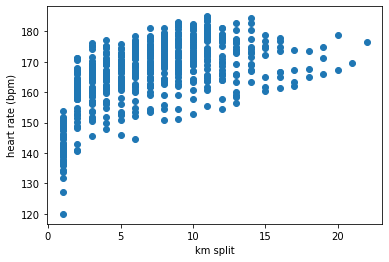

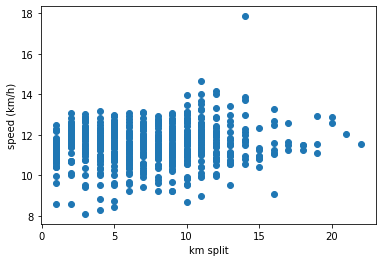

In [4]:
from stravadataanalysis.src.domain import split_metrics
from stravadataanalysis.src.view import plot

runs_activities = runs[runs['workout_type'] != 3].reset_index()
metrics = split_metrics.extract_split_metrics(runs_activities)

plot.plot_split_metric_heartrate(metrics)
plot.plot_split_metric_speed(metrics)